In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [6]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


PREPROCESSING

In [9]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


C:\Users\pokal\AppData\Local\Temp\ipykernel_7744\1126140220.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['expenses'],color='red')


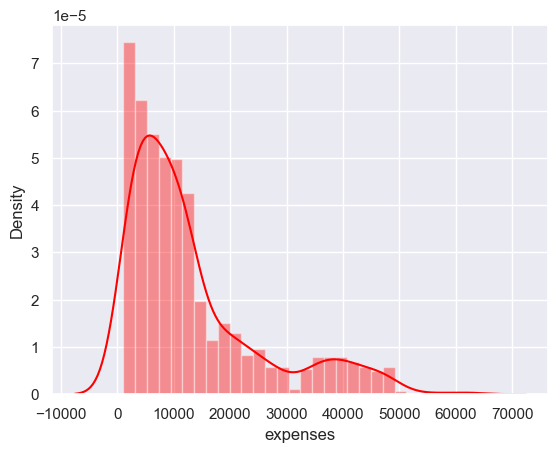

In [13]:
sns.distplot(data['expenses'],color='red')
plt.show()

C:\Users\pokal\AppData\Local\Temp\ipykernel_7744\3855236344.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['children'],color='red')


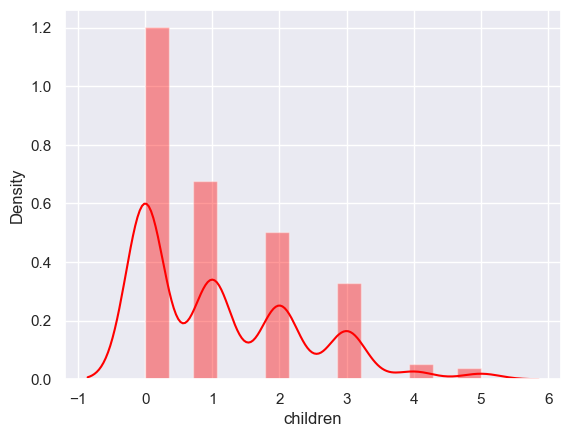

In [15]:
sns.distplot(data['children'],color='red')
plt.show()

RELAXING OLS ASSUMPTIONS

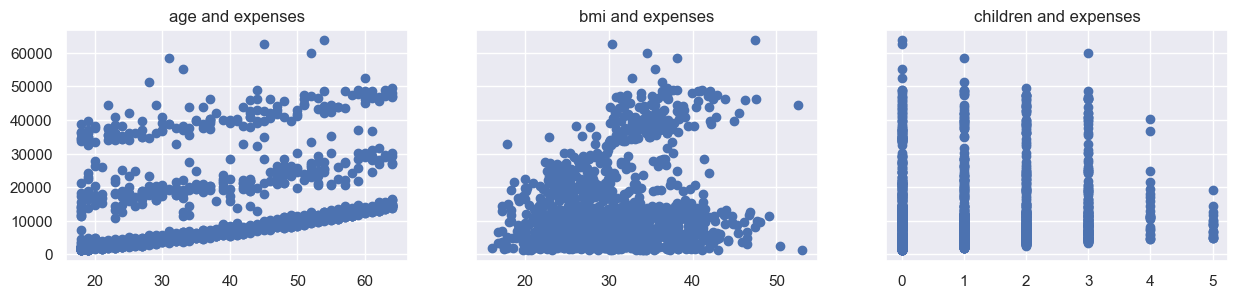

In [20]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data['age'],data['expenses'])
ax1.set_title('age and expenses')
ax2.scatter(data['bmi'],data['expenses'])
ax2.set_title('bmi and expenses')
ax3.scatter(data['children'],data['expenses'])
ax3.set_title('children and expenses')
plt.show()

In [22]:
log_expenses=np.log(data['expenses'])
data['log_expenses']=log_expenses
data

,age,sex,bmi,children,smoker,region,expenses,log_expenses
0,19,female,27.9,0,yes,southwest,16884.92,9.734176
1,18,male,33.8,1,no,southeast,1725.55,7.453301
2,28,male,33.0,3,no,southeast,4449.46,8.400538
3,33,male,22.7,0,no,northwest,21984.47,9.998092
4,32,male,28.9,0,no,northwest,3866.86,8.260198
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,9.268661
1334,18,female,31.9,0,no,northeast,2205.98,7.698927
1335,18,female,36.9,0,no,southeast,1629.83,7.396231
1336,21,female,25.8,0,no,southwest,2007.95,7.604870


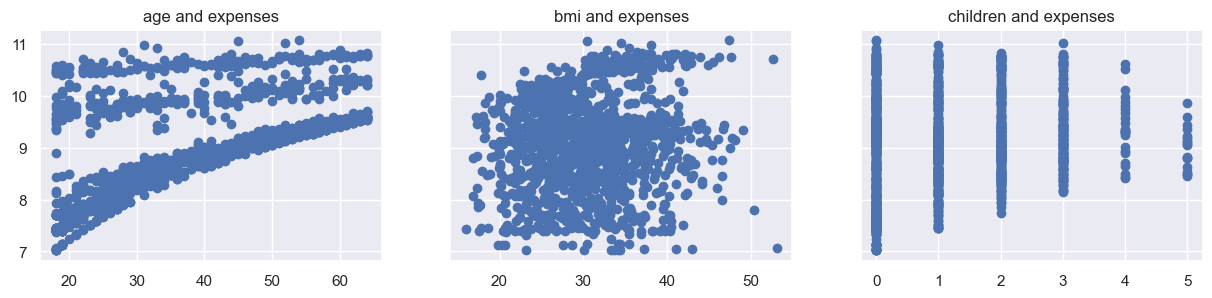

In [24]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data['age'],data['log_expenses'])
ax1.set_title('age and expenses')
ax2.scatter(data['bmi'],data['log_expenses'])
ax2.set_title('bmi and expenses')
ax3.scatter(data['children'],data['log_expenses'])
ax3.set_title('children and expenses')
plt.show()

In [26]:
data1=data.drop(['expenses'],axis=1)

In [28]:
data1

,age,sex,bmi,children,smoker,region,log_expenses
0,19,female,27.9,0,yes,southwest,9.734176
1,18,male,33.8,1,no,southeast,7.453301
2,28,male,33.0,3,no,southeast,8.400538
3,33,male,22.7,0,no,northwest,9.998092
4,32,male,28.9,0,no,northwest,8.260198
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,9.268661
1334,18,female,31.9,0,no,northeast,7.698927
1335,18,female,36.9,0,no,southeast,7.396231
1336,21,female,25.8,0,no,southwest,7.604870


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data1[['age','bmi','children']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [34]:
vif

,VIF,features
0,7.537196,age
1,7.846898,bmi
2,1.796587,children


CREATE DUMMY VARIABLES

In [37]:
data_dum=pd.get_dummies(data1,drop_first=True)
data_dum.head()

,age,bmi,children,log_expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,9.734176,False,True,False,False,True
1,18,33.8,1,7.453301,True,False,False,True,False
2,28,33.0,3,8.400538,True,False,False,True,False
3,33,22.7,0,9.998092,True,False,True,False,False
4,32,28.9,0,8.260198,True,False,True,False,False


In [216]:
targets=data_dum['log_expenses']
inputs=data_dum.drop(['log_expenses'],axis=1)

In [218]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaler.fit(inputs)

In [220]:
#inputs_scaled=scaler.transform(inputs)

In [222]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.2,random_state=365)

In [224]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [237]:
yhat=reg.predict(x_test)

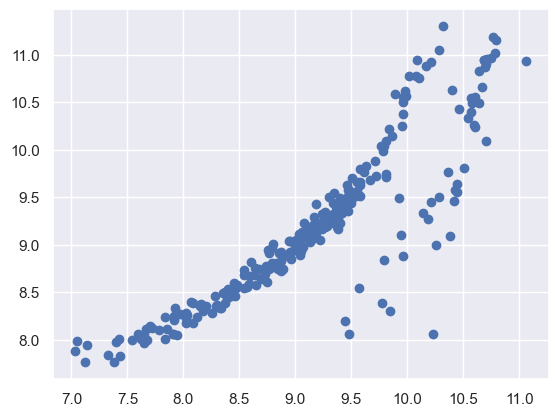

In [239]:
plt.scatter(y_test,yhat)
plt.show()

In [241]:
reg.score(x_train,y_train)

0.7640273306206005

In [243]:
reg.intercept_

7.060954291518813

In [245]:
reg.coef_

array([ 0.03439172,  0.01284914,  0.10047015, -0.06296243,  1.59085857,
       -0.07401678, -0.18062049, -0.14932152])

In [247]:
reg_sum=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_sum['Weights']=reg.coef_
reg_sum

,Features,Weights
0,age,0.034392
1,bmi,0.012849
2,children,0.100470
3,sex_male,-0.062962
4,smoker_yes,1.590859
5,region_northwest,-0.074017
6,region_southeast,-0.180620
7,region_southwest,-0.149322


In [249]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),inputs_scaled,targets,cv=cv)


array([0.79030347, 0.79043616, 0.71529985, 0.80049021, 0.8396816 ])

In [251]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(inputs, targets):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}  # Removed 'normalize' since it's deprecated
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Fixed deprecated 'mse'
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(inputs, targets)
        
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example call:
find_best_model_using_gridsearchcv(inputs, targets)


,model,best_score,best_params
0,linear_regression,0.787242,{}
1,lasso,0.294370,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.728143,"{'criterion': 'squared_error', 'splitter': 'be..."


In [253]:
data_dum.head()

,age,bmi,children,log_expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,9.734176,False,True,False,False,True
1,18,33.8,1,7.453301,True,False,False,True,False
2,28,33.0,3,8.400538,True,False,False,True,False
3,33,22.7,0,9.998092,True,False,True,False,False
4,32,28.9,0,8.260198,True,False,True,False,False


In [265]:
def predict_expenses(age, bmi, children, sex, smoker, region):
    """
    Predicts medical expenses based on input features.
    
    Parameters:
    - age (int): Age of the individual
    - bmi (float): Body Mass Index
    - children (int): Number of children/dependents
    - sex (str): "male" or "female"
    - smoker (str): "yes" or "no"
    - region (str): One of ["northeast", "northwest", "southeast", "southwest"]
    
    Returns:
    - Predicted medical expense
    """

    # One-hot encoding for categorical variables
    sex_male = 1 if sex.lower() == "male" else 0
    smoker_yes = 1 if smoker.lower() == "yes" else 0

    # One-hot encoding for regions
    region_northwest = 1 if region.lower() == "northwest" else 0
    region_southeast = 1 if region.lower() == "southeast" else 0
    region_southwest = 1 if region.lower() == "southwest" else 0

    # Input array in correct order
    input_data = np.array([[age, bmi, children, sex_male, smoker_yes, 
                            region_northwest, region_southeast, region_southwest]])

    # Predict expenses
    predicted_expense =np.exp(reg.predict(input_data)[0])
    
    return predicted_expense

In [267]:
predict_expenses(21,28,2,'male','yes','southeast')

C:\Users\pokal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


16174.194536051318

In [269]:
data.head()

,age,sex,bmi,children,smoker,region,expenses,log_expenses
0,19,female,27.9,0,yes,southwest,16884.92,9.734176
1,18,male,33.8,1,no,southeast,1725.55,7.453301
2,28,male,33.0,3,no,southeast,4449.46,8.400538
3,33,male,22.7,0,no,northwest,21984.47,9.998092
4,32,male,28.9,0,no,northwest,3866.86,8.260198


In [275]:
predict_expenses(19,27.9,0,'female','yes','southwest')

C:\Users\pokal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


13553.838464784934

In [277]:
import pickle
with open('insurance_expense_model.pickle','wb')as f:
    pickle.dump(reg,f)